# Import Dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [50]:
data_df = pd.DataFrame(data = data.data,
					columns = data.feature_names)
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# EDA

<Figure size 1500x2000 with 0 Axes>

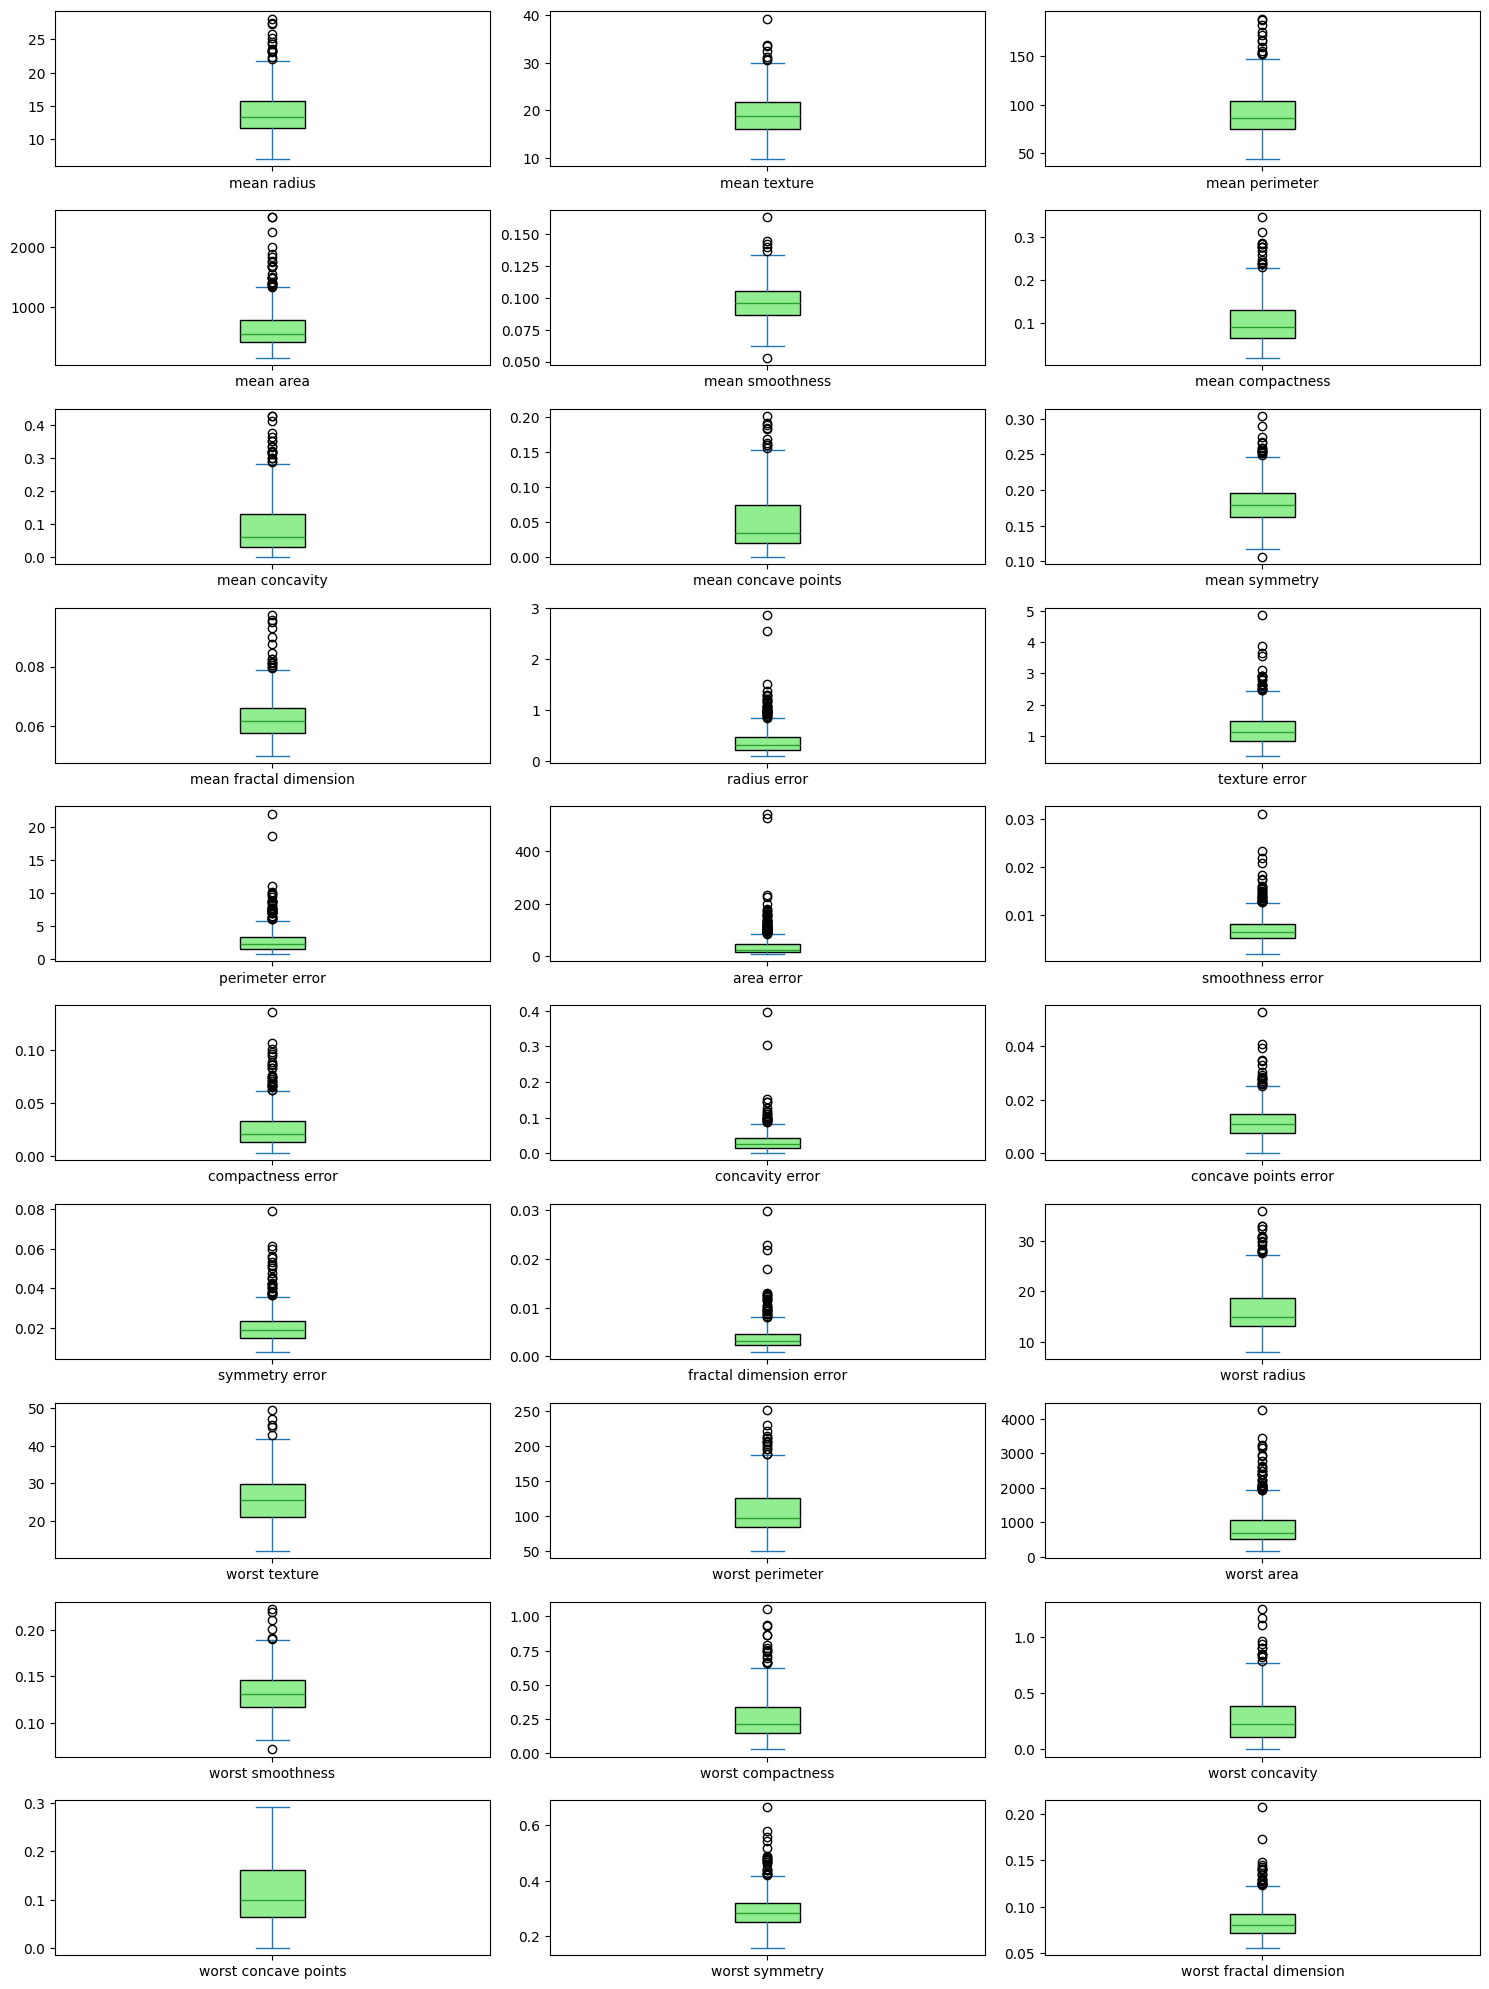

In [51]:
#  Membuat boxplot untuk setiap variabel
plt.figure(figsize=(15, 20))

# Membuat boxplot
data_df.plot(kind='box', subplots=True, layout=(10, 3), figsize=(15, 20), grid=False,
             patch_artist=True, boxprops=dict(facecolor="lightgreen"))

# Menampilkan plot
plt.tight_layout()
plt.show()

# Stardarisasi

In [52]:
# Inisialisasi MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Transformasi data
df_scaled = pd.DataFrame(scaler.fit_transform(data_df), columns=data_df.columns)

# Split Data

In [53]:
X = df_scaled # Fitur
y = data.target  # Label
X, y

(     mean radius  mean texture  ...  worst symmetry  worst fractal dimension
 0       0.521037      0.022658  ...        0.598462                 0.418864
 1       0.643144      0.272574  ...        0.233590                 0.222878
 2       0.601496      0.390260  ...        0.403706                 0.213433
 3       0.210090      0.360839  ...        1.000000                 0.773711
 4       0.629893      0.156578  ...        0.157500                 0.142595
 ..           ...           ...  ...             ...                      ...
 564     0.690000      0.428813  ...        0.097575                 0.105667
 565     0.622320      0.626987  ...        0.198502                 0.074315
 566     0.455251      0.621238  ...        0.128721                 0.151909
 567     0.644564      0.663510  ...        0.497142                 0.452315
 568     0.036869      0.501522  ...        0.257441                 0.100682
 
 [569 rows x 30 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [54]:
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

In [55]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

## Random Forest

In [56]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

print("Random Forest Classifier")
print(classification_report(y_test, predictions_rf, digits=4))

Random Forest Classifier
              precision    recall  f1-score   support

           0     0.9756    0.9302    0.9524        43
           1     0.9589    0.9859    0.9722        71

    accuracy                         0.9649       114
   macro avg     0.9673    0.9581    0.9623       114
weighted avg     0.9652    0.9649    0.9647       114



## Histogram Gradient Boosting Classifier

In [57]:
hgbc_sm_clf = HistGradientBoostingClassifier(random_state=42)
hgbc_sm_clf.fit(X_train, y_train)
hgbc_sm_pred = hgbc_sm_clf.predict(X_test)
metrics = classification_report(y_test, hgbc_sm_pred, digits=4)
print("\n",metrics)


               precision    recall  f1-score   support

           0     0.9762    0.9535    0.9647        43
           1     0.9722    0.9859    0.9790        71

    accuracy                         0.9737       114
   macro avg     0.9742    0.9697    0.9719       114
weighted avg     0.9737    0.9737    0.9736       114



## XGBoost

In [58]:
import xgboost as xgb
model = xgb.XGBClassifier(
    n_estimators=100,  # Jumlah pohon (trees)
    learning_rate=0.1,  # Tingkat pembelajaran
    max_depth=5,       # Kedalaman maksimum pohon
    random_state=42,    # Seed untuk reproducibility
    objective='binary:logistic'  # Untuk klasifikasi biner
)

# Melatih model
model.fit(X_train,y_train)
xgb_pred = model.predict(X_test)
metrics2 = classification_report(y_test, xgb_pred, digits=4)
print("\n",metrics2)


               precision    recall  f1-score   support

           0     0.9524    0.9302    0.9412        43
           1     0.9583    0.9718    0.9650        71

    accuracy                         0.9561       114
   macro avg     0.9554    0.9510    0.9531       114
weighted avg     0.9561    0.9561    0.9560       114



## LightGBM

In [59]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_lgb.fit(X_train,y_train)
lgb_pred = model_lgb.predict(X_test)
metrics3 = classification_report(y_test, lgb_pred, digits=4)
print("\n",metrics3)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 